In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [6]:
df = pd.read_csv('Steel_industry_data.csv')
df.head()


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [9]:
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMemory Usage:\n{df.memory_usage(deep=True)}")


Shape: (35040, 11)

Columns: ['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']

Data Types:
date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

Memory Usage:
Index                                       132
date                                    2277600
Usage_kWh                                280320
Lagging_Current_Reactive.Powe

In [11]:
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing: {df.isnull().sum().sum()}")
print(f"\nDuplicate Rows: {df.duplicated().sum()}")


Missing Values:
date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

Total Missing: 0

Duplicate Rows: 0


In [13]:
df.describe()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [15]:
categorical_cols = ['WeekStatus', 'Day_of_week', 'Load_Type']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())



WeekStatus:
WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64

Day_of_week:
Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64

Load_Type:
Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64


In [52]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [54]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
correlation_matrix


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,hour,day,month
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,2.346103e-01,2.341748e-01,-8.170491e-03,-1.139607e-01
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,8.266237e-02,8.125047e-02,-1.212823e-02,-4.213561e-02
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,3.716046e-01,3.727349e-01,-1.366688e-02,-2.709951e-02
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,2.317260e-01,2.313063e-01,-6.095822e-04,-1.083105e-01
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,5.652695e-01,5.665439e-01,2.568839e-02,-8.705239e-02
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-3.605630e-01,-3.614087e-01,7.403688e-03,-3.232157e-02
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000e+00,9.991858e-01,-4.184369e-17,2.297820e-15
hour,0.234175,0.081250,0.372735,0.231306,0.566544,-0.361409,9.991858e-01,1.000000e+00,1.560053e-16,-6.087321e-16
day,-0.008170,-0.012128,-0.013667,-0.000610,0.025688,0.007404,-4.184369e-17,1.560053e-16,1.000000e+00,1.189318e-02
month,-0.113961,-0.042136,-0.027100,-0.108311,-0.087052,-0.032322,2.297820e-15,-6.087321e-16,1.189318e-02,1.000000e+00


In [55]:
numeric_features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 
                    'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 
                    'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']

outlier_summary = {}
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

pd.DataFrame(outlier_summary.items(), columns=['Feature', 'Outlier_Count'])


,Feature,Outlier_Count
0,Usage_kWh,328
1,Lagging_Current_Reactive.Power_kVarh,1059
2,Leading_Current_Reactive_Power_kVarh,7759
3,CO2(tCO2),437
4,Lagging_Current_Power_Factor,1
5,Leading_Current_Power_Factor,8327


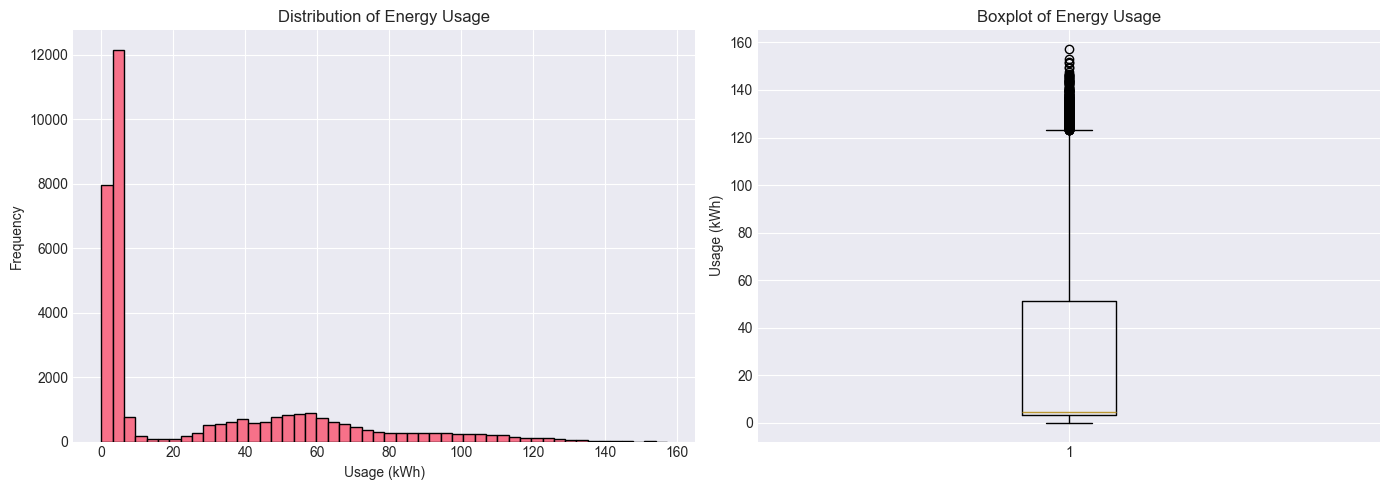

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Usage_kWh'], bins=50, edgecolor='black')
axes[0].set_xlabel('Usage (kWh)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Energy Usage')

axes[1].boxplot(df['Usage_kWh'])
axes[1].set_ylabel('Usage (kWh)')
axes[1].set_title('Boxplot of Energy Usage')

plt.tight_layout()
plt.show()


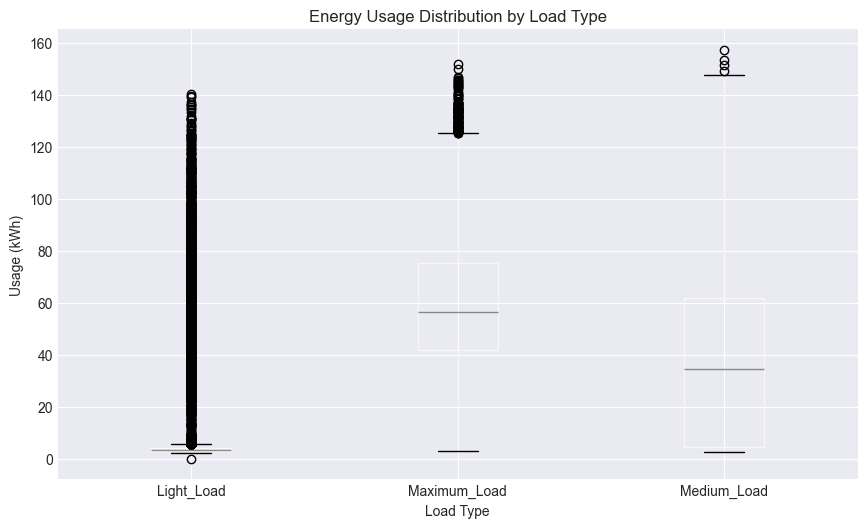

In [57]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Usage_kWh', by='Load_Type', ax=plt.gca())
plt.title('Energy Usage Distribution by Load Type')
plt.suptitle('')
plt.xlabel('Load Type')
plt.ylabel('Usage (kWh)')
plt.show()


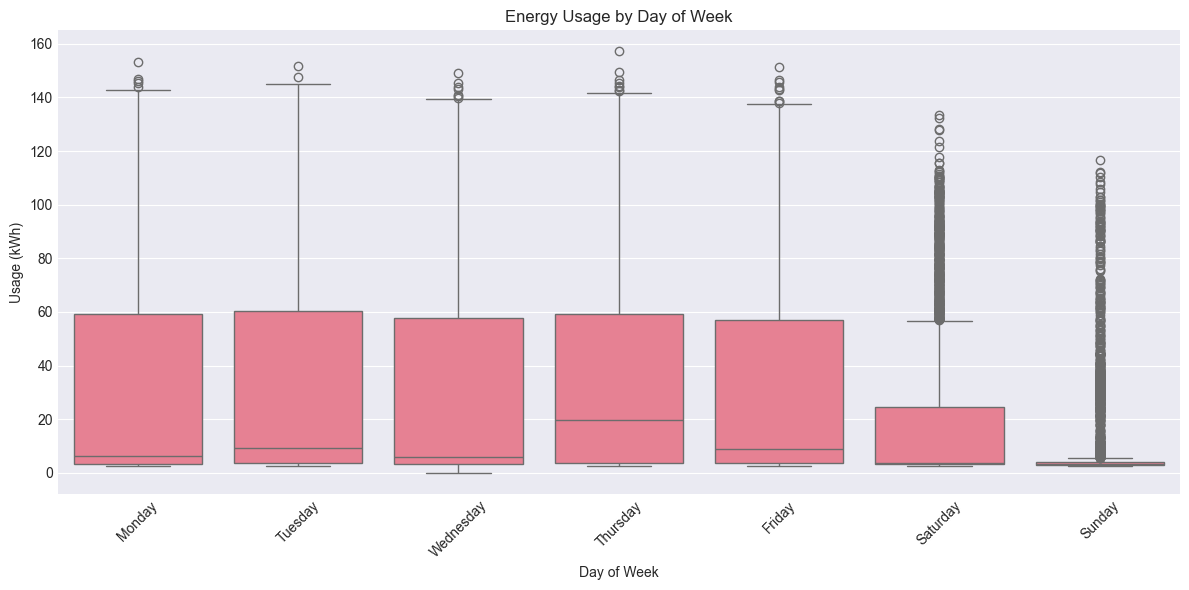

In [58]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Day_of_week', y='Usage_kWh', order=day_order)
plt.xticks(rotation=45)
plt.title('Energy Usage by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Usage (kWh)')
plt.tight_layout()
plt.show()


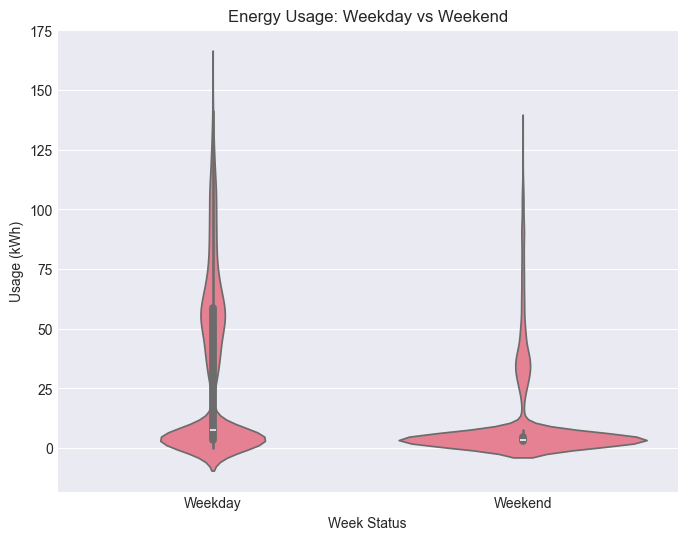

In [59]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='WeekStatus', y='Usage_kWh')
plt.title('Energy Usage: Weekday vs Weekend')
plt.xlabel('Week Status')
plt.ylabel('Usage (kWh)')
plt.show()


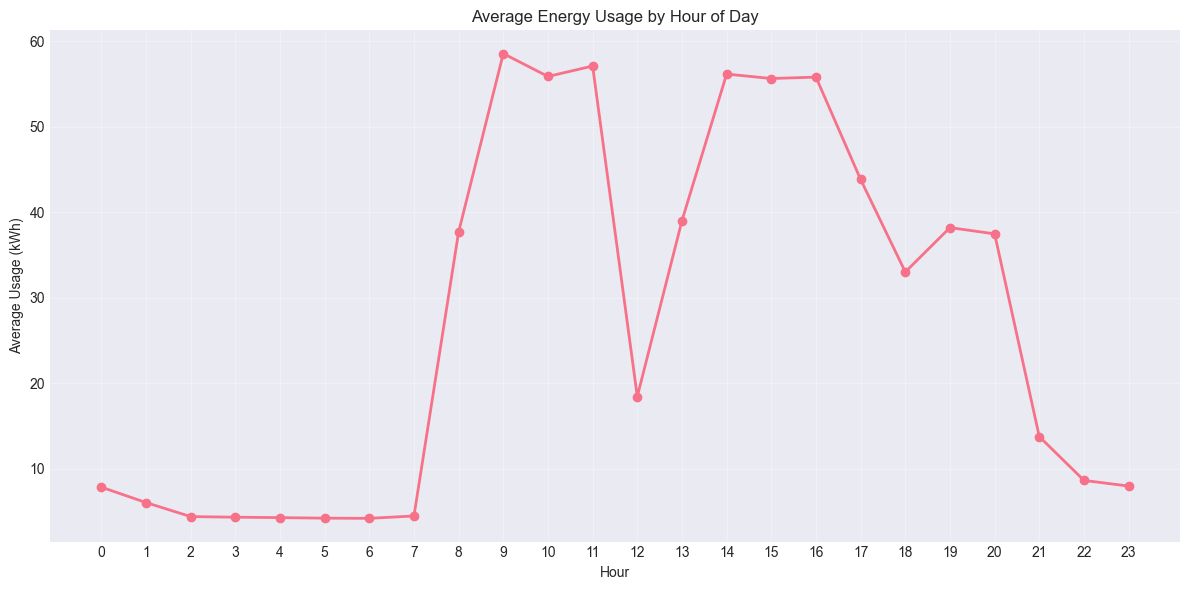

In [60]:
hourly_usage = df.groupby('hour')['Usage_kWh'].mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_usage.index, hourly_usage.values, marker='o', linewidth=2)
plt.title('Average Energy Usage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Usage (kWh)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


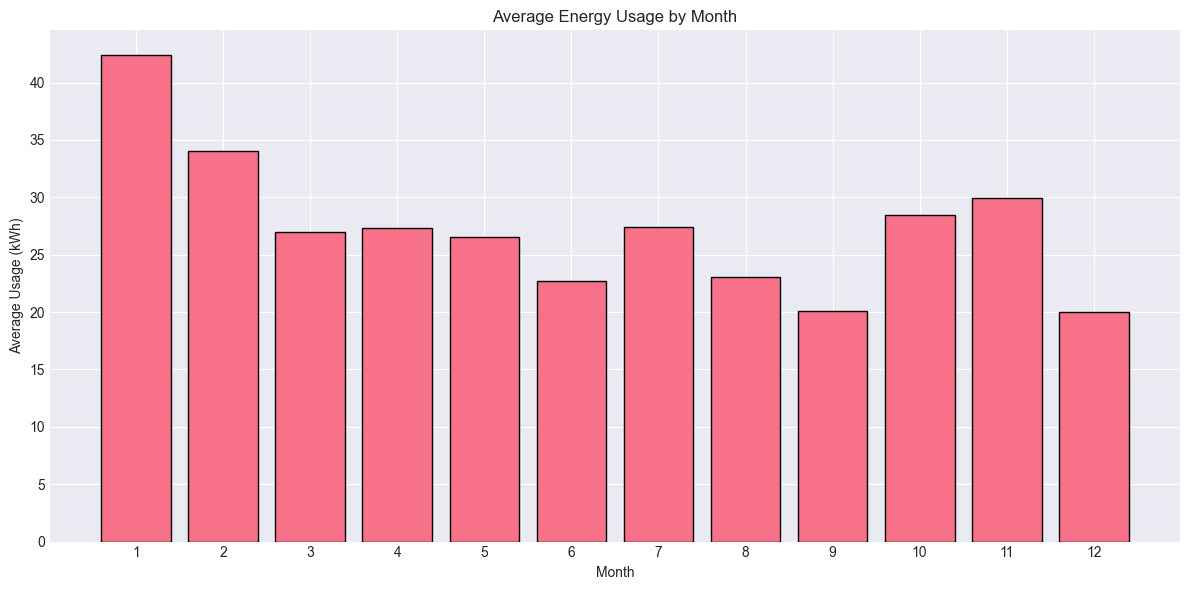

In [61]:
monthly_usage = df.groupby('month')['Usage_kWh'].mean()
plt.figure(figsize=(12, 6))
plt.bar(monthly_usage.index, monthly_usage.values, edgecolor='black')
plt.title('Average Energy Usage by Month')
plt.xlabel('Month')
plt.ylabel('Average Usage (kWh)')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


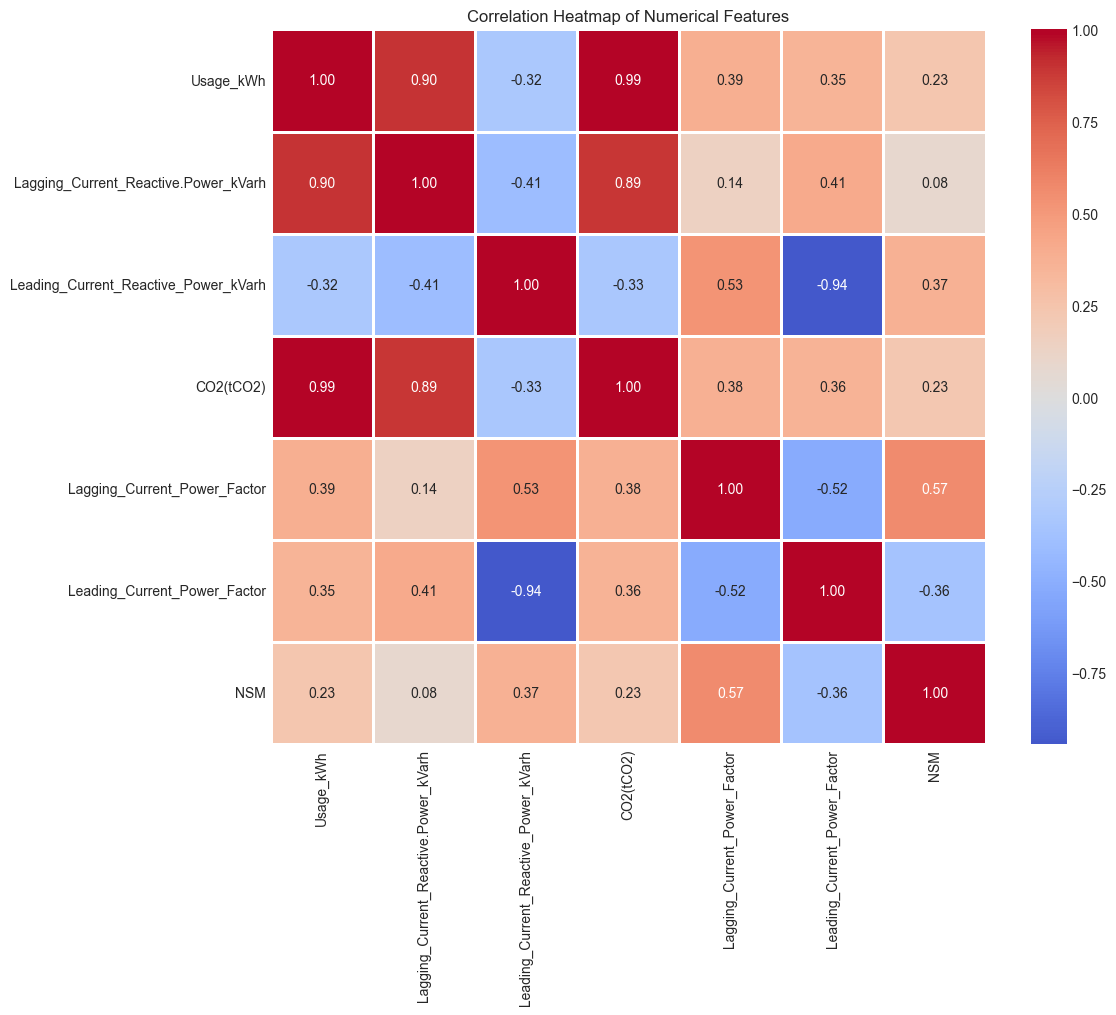

In [62]:
plt.figure(figsize=(12, 10))
correlation_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 
                    'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 
                    'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
sns.heatmap(df[correlation_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


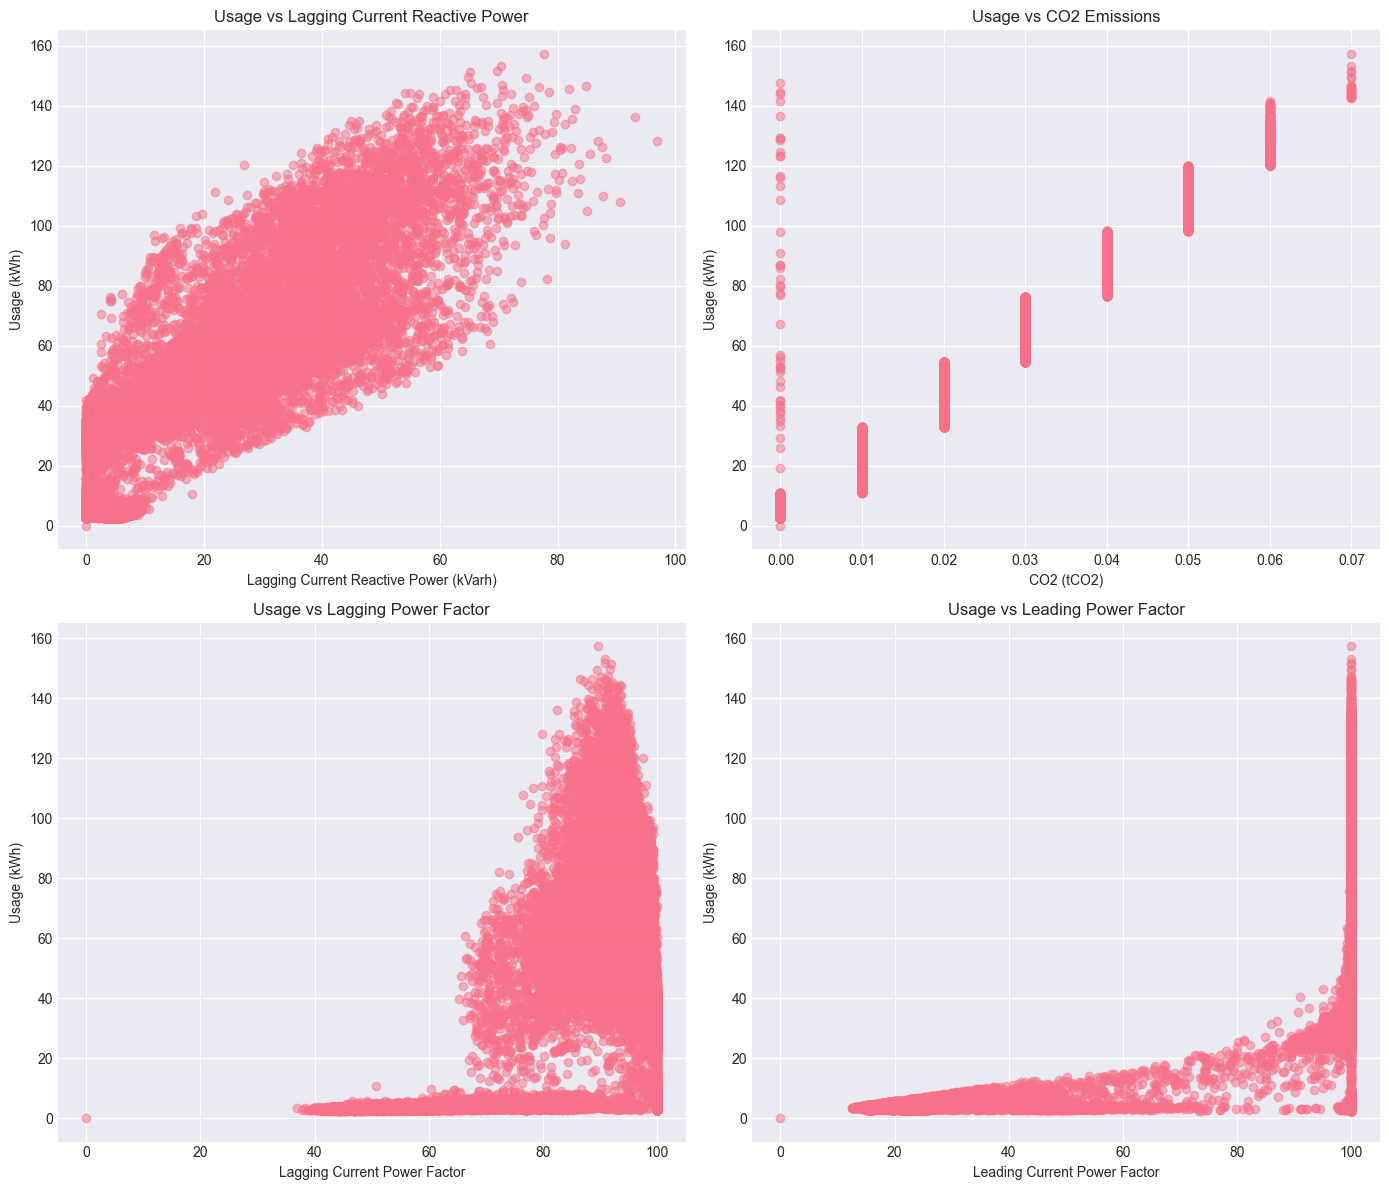

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes[0, 0].scatter(df['Lagging_Current_Reactive.Power_kVarh'], df['Usage_kWh'], alpha=0.5)
axes[0, 0].set_xlabel('Lagging Current Reactive Power (kVarh)')
axes[0, 0].set_ylabel('Usage (kWh)')
axes[0, 0].set_title('Usage vs Lagging Current Reactive Power')

axes[0, 1].scatter(df['CO2(tCO2)'], df['Usage_kWh'], alpha=0.5)
axes[0, 1].set_xlabel('CO2 (tCO2)')
axes[0, 1].set_ylabel('Usage (kWh)')
axes[0, 1].set_title('Usage vs CO2 Emissions')

axes[1, 0].scatter(df['Lagging_Current_Power_Factor'], df['Usage_kWh'], alpha=0.5)
axes[1, 0].set_xlabel('Lagging Current Power Factor')
axes[1, 0].set_ylabel('Usage (kWh)')
axes[1, 0].set_title('Usage vs Lagging Power Factor')

axes[1, 1].scatter(df['Leading_Current_Power_Factor'], df['Usage_kWh'], alpha=0.5)
axes[1, 1].set_xlabel('Leading Current Power Factor')
axes[1, 1].set_ylabel('Usage (kWh)')
axes[1, 1].set_title('Usage vs Leading Power Factor')

plt.tight_layout()
plt.show()


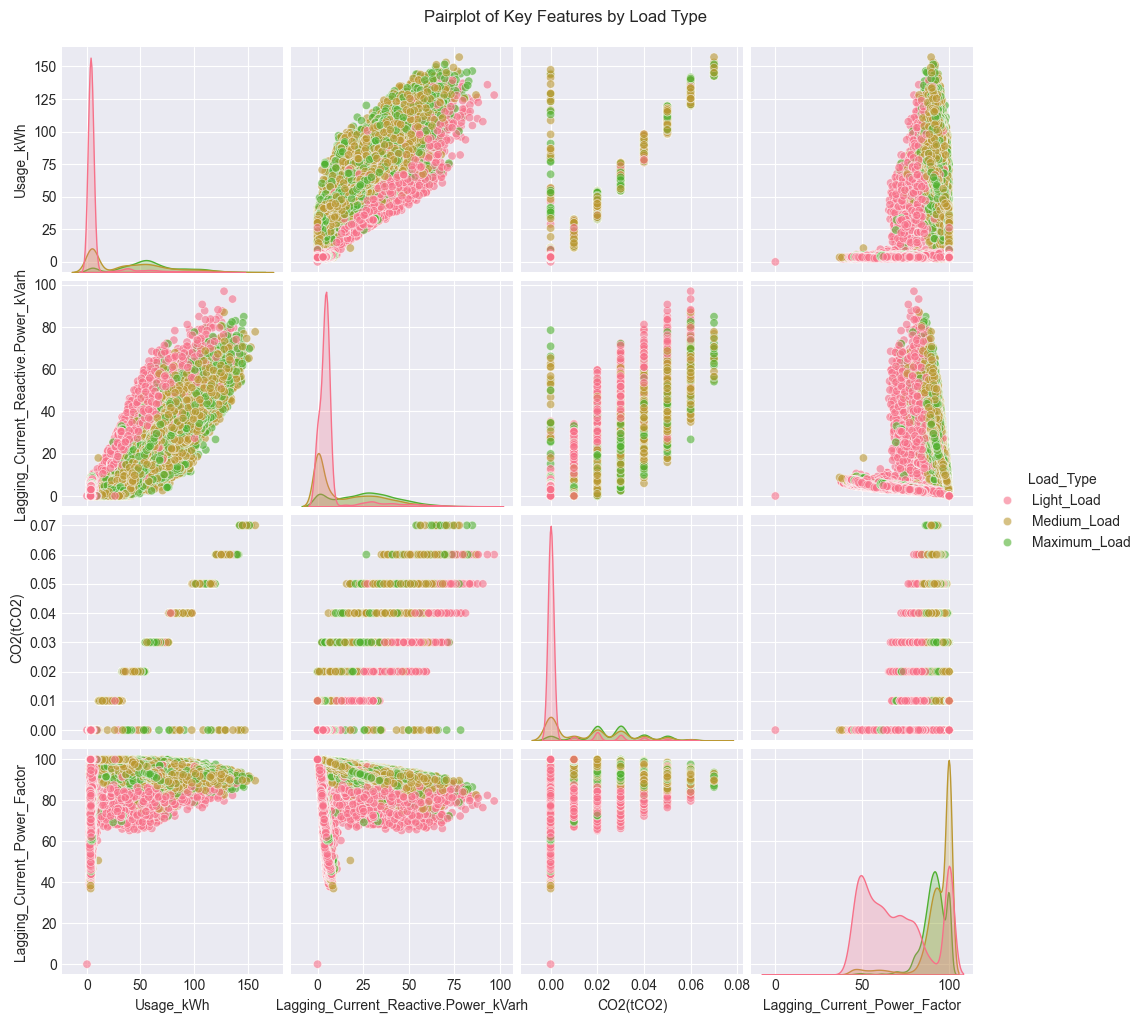

In [64]:
key_features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 
                'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Load_Type']
sns.pairplot(df[key_features], hue='Load_Type', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Features by Load Type', y=1.02)
plt.show()


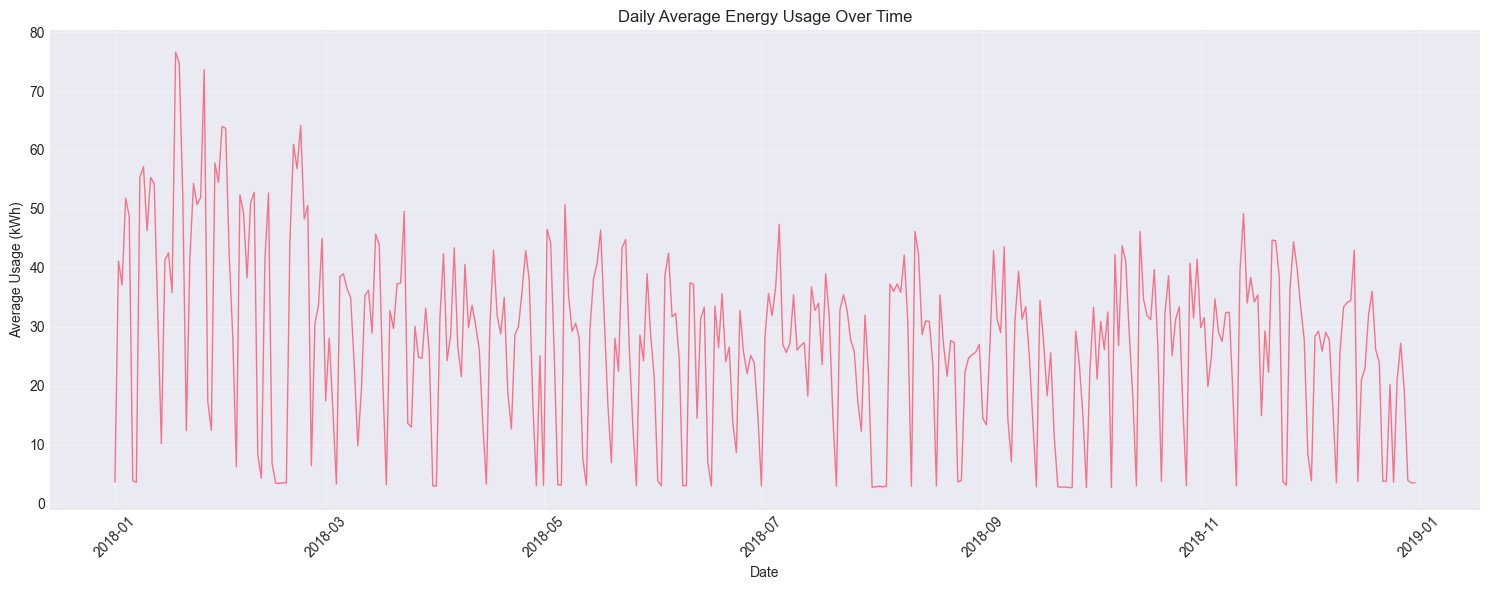

In [65]:
daily_usage = df.groupby(df['date'].dt.date)['Usage_kWh'].mean()
plt.figure(figsize=(15, 6))
plt.plot(daily_usage.index, daily_usage.values, linewidth=1)
plt.title('Daily Average Energy Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Average Usage (kWh)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


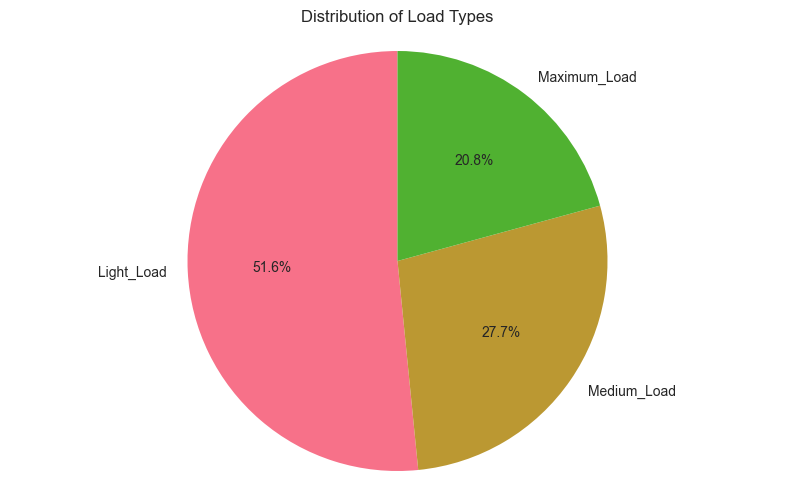

In [66]:
plt.figure(figsize=(10, 6))
load_type_counts = df['Load_Type'].value_counts()
plt.pie(load_type_counts.values, labels=load_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Load Types')
plt.axis('equal')
plt.show()


In [67]:
df.groupby('Load_Type')['Usage_kWh'].describe()


,count,mean,std,min,25%,50%,75%,max
Load_Type,,,,,,,,
Light_Load,18072.0,8.626207,17.906245,0.00,2.9500,3.310,4.03,140.29
Maximum_Load,7272.0,59.265314,29.749700,2.92,42.0025,56.630,75.31,151.67
Medium_Load,9696.0,38.445394,35.220166,2.52,4.4200,34.435,61.70,157.18


In [68]:
print("Zero values in numeric columns:")
for col in numeric_features:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} ({zero_count/len(df)*100:.2f}%)")


Zero values in numeric columns:
Usage_kWh: 1 (0.00%)
Lagging_Current_Reactive.Power_kVarh: 7194 (20.53%)
Leading_Current_Reactive_Power_kVarh: 23610 (67.38%)
CO2(tCO2): 20990 (59.90%)
Lagging_Current_Power_Factor: 1 (0.00%)
Leading_Current_Power_Factor: 1 (0.00%)


In [69]:
print(f"Final dataset shape: {df.shape}")
print(f"\nColumn names:\n{list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nNo missing values: {df.isnull().sum().sum() == 0}")


Final dataset shape: (35040, 14)

Column names:
['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'hour', 'day', 'month']

Data types:
date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
hour                                             int32
day                        

Training set: (24394, 168, 8)
Validation set: (5227, 168, 8)
Test set: (5228, 168, 8)
Epoch 1/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.3992 - mae: 0.5240 - mse: 0.5491
Epoch 1: val_loss improved from inf to 0.14546, saving model to best_lstm_model.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 118s 150ms/step - loss: 0.3990 - mae: 0.5239 - mse: 0.5490 - val_loss: 0.1455 - val_mae: 0.3195 - val_mse: 0.2884 - learning_rate: 0.0010
Epoch 2/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 0.1780 - mae: 0.3964 - mse: 0.3651
Epoch 2: val_loss improved from 0.14546 to 0.13580, saving model to best_lstm_model.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 134s 175ms/step - loss: 0.1779 - mae: 0.3964 - mse: 0.3651 - val_loss: 0.1358 - val_mae: 0.3084 - val_mse: 0.2705 - learning_rate: 0.0010
Epoch 3/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.1621 - mae: 0.3737 - mse: 0.3333
Epoch 3: val_loss improved from 0.13580 to 0.12741, saving model to best_lstm_model.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 141s 185ms/step - loss: 0.1621 - mae: 0.3737 - mse: 0.3333 - val_loss: 0.1274 - val_mae: 0.2995 - val_mse: 0.2536 - learning_rate: 0.0010
Epoch 4/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1544 - mae: 0.3635 - mse: 0.3160
Epoch 4: val_loss improved from 0.12741 to 0.11666, saving model to best_lstm_model.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 117s 153ms/step - loss: 0.1543 - mae: 0.3635 - mse: 0.3160 - val_loss: 0.1167 - val_mae: 0.2824 - val_mse: 0.2307 - learning_rate: 0.0010
Epoch 5/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1484 - mae: 0.3543 - mse: 0.3031
Epoch 5: val_loss did not improve from 0.11666
763/763 ━━━━━━━━━━━━━━━━━━━━ 115s 151ms/step - loss: 0.1484 - mae: 0.3543 - mse: 0.3031 - val_loss: 0.1339 - val_mae: 0.3057 - val_mse: 0.2703 - learning_rate: 0.0010
Epoch 6/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1433 - mae: 0.3481 - mse: 0.2916
Epoch 6: val_loss did not improve from 0.11666
763/763 ━━━━━━━━━━━━━━━━━━━━ 115s 151ms/step - loss: 0.1433 - mae: 0.3481 - mse: 0.2916 - val_loss: 0.1249 - val_mae: 0.2896 - val_mse: 0.2501 - learning_rate: 0.0010
Epoch 7/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.1435 - mae: 0.3470 - mse: 0.2919
Epoch 7: val_loss did not improve from 0.11666
763/763 ━━━━━━━━━━━━━━━━━━━━ 114s 149ms/step - loss: 0.1435 - ma

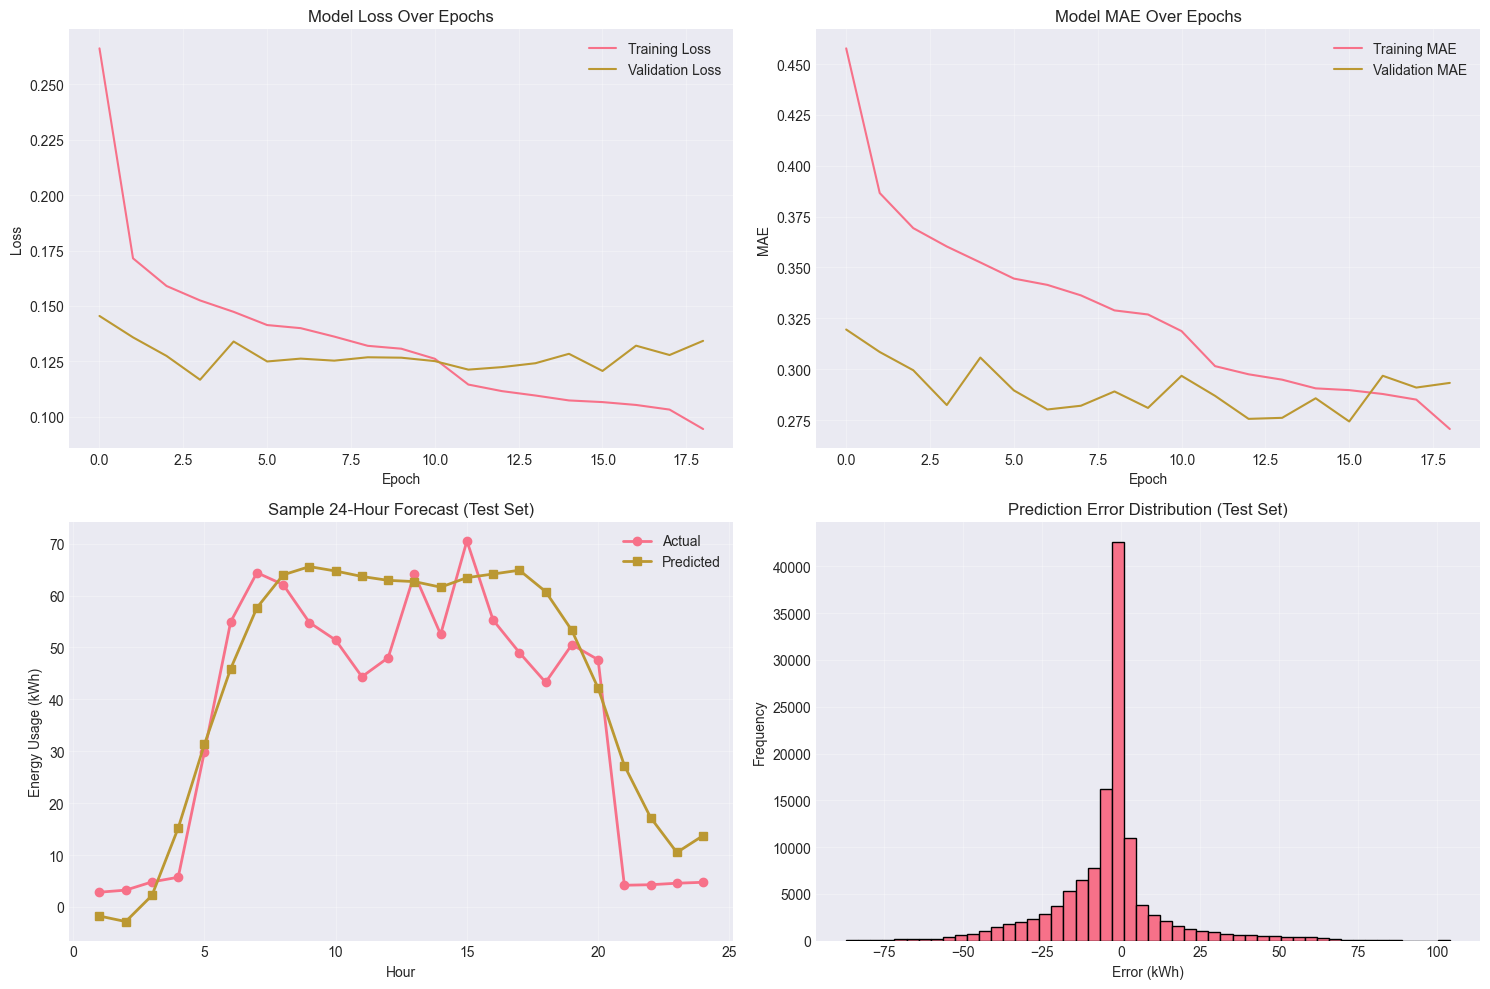

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 168, 256)            │         140,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 168, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 943,370 (3.60 MB)

 Trainable params: 314,456 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 628,914 (2.40 MB)

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

df_model = df.copy()
df_model = df_model.sort_values('date').reset_index(drop=True)

le_load = LabelEncoder()
le_week = LabelEncoder()
le_day = LabelEncoder()
df_model['Load_Type_encoded'] = le_load.fit_transform(df_model['Load_Type'])
df_model['WeekStatus_encoded'] = le_week.fit_transform(df_model['WeekStatus'])
df_model['Day_of_week_encoded'] = le_day.fit_transform(df_model['Day_of_week'])

features = ['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)', 
            'Lagging_Current_Power_Factor', 'NSM', 'hour',
            'Load_Type_encoded', 'WeekStatus_encoded', 'Day_of_week_encoded']
target = 'Usage_kWh'

data = df_model[features + [target]].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()

data[:, :-1] = scaler_X.fit_transform(data[:, :-1])
data[:, -1:] = scaler_y.fit_transform(data[:, -1:])

def create_sequences(data, lookback=168, forecast_horizon=24):
    X, y = [], []
    for i in range(len(data) - lookback - forecast_horizon + 1):
        X.append(data[i:i+lookback, :-1])
        y.append(data[i+lookback:i+lookback+forecast_horizon, -1])
    return np.array(X), np.array(y)

lookback = 168
forecast_horizon = 24

X, y = create_sequences(data, lookback, forecast_horizon)

train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001)), 
                  input_shape=(lookback, len(features))),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=keras.regularizers.l2(0.001))),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(forecast_horizon)
])

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='huber', metrics=['mae', 'mse'])

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-7, verbose=1)
checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

model.load_weights('best_lstm_model.h5')

y_train_pred = model.predict(X_train, verbose=0)
y_val_pred = model.predict(X_val, verbose=0)
y_test_pred = model.predict(X_test, verbose=0)

y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1)).reshape(y_train.shape)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).reshape(y_train_pred.shape)
y_val_actual = scaler_y.inverse_transform(y_val.reshape(-1, 1)).reshape(y_val.shape)
y_val_pred_inv = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).reshape(y_val_pred.shape)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).reshape(y_test_pred.shape)

train_rmse = np.sqrt(mean_squared_error(y_train_actual.flatten(), y_train_pred_inv.flatten()))
train_mae = mean_absolute_error(y_train_actual.flatten(), y_train_pred_inv.flatten())
train_r2 = r2_score(y_train_actual.flatten(), y_train_pred_inv.flatten())

val_rmse = np.sqrt(mean_squared_error(y_val_actual.flatten(), y_val_pred_inv.flatten()))
val_mae = mean_absolute_error(y_val_actual.flatten(), y_val_pred_inv.flatten())
val_r2 = r2_score(y_val_actual.flatten(), y_val_pred_inv.flatten())

test_rmse = np.sqrt(mean_squared_error(y_test_actual.flatten(), y_test_pred_inv.flatten()))
test_mae = mean_absolute_error(y_test_actual.flatten(), y_test_pred_inv.flatten())
test_r2 = r2_score(y_test_actual.flatten(), y_test_pred_inv.flatten())

print("\n" + "="*80)
print("MODEL PERFORMANCE METRICS")
print("="*80)
print(f"\nTRAINING SET:")
print(f"  RMSE: {train_rmse:.4f} kWh")
print(f"  MAE:  {train_mae:.4f} kWh")
print(f"  R²:   {train_r2:.4f}")

print(f"\nVALIDATION SET:")
print(f"  RMSE: {val_rmse:.4f} kWh")
print(f"  MAE:  {val_mae:.4f} kWh")
print(f"  R²:   {val_r2:.4f}")

print(f"\nTEST SET:")
print(f"  RMSE: {test_rmse:.4f} kWh")
print(f"  MAE:  {test_mae:.4f} kWh")
print(f"  R²:   {test_r2:.4f}")
print("="*80)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

sample_idx = 0
plt.subplot(2, 2, 3)
plt.plot(range(1, 25), y_test_actual[sample_idx], 'o-', label='Actual', linewidth=2)
plt.plot(range(1, 25), y_test_pred_inv[sample_idx], 's-', label='Predicted', linewidth=2)
plt.title('Sample 24-Hour Forecast (Test Set)')
plt.xlabel('Hour')
plt.ylabel('Energy Usage (kWh)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
errors = y_test_actual.flatten() - y_test_pred_inv.flatten()
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Prediction Error Distribution (Test Set)')
plt.xlabel('Error (kWh)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

model.summary()
